In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier
from sklearn.impute import SimpleImputer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import plotly.express as px
import plotly.graph_objects as go
import math

In [2]:
df = pd.read_csv('Dileep bhai.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df.rename(columns={'male' : 'sex'}  , inplace=True)
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
df1 = df.copy(deep=True)

In [7]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
df1[df1.columns]=imputer.fit_transform(df1[df1.columns])

In [8]:
df1.isnull().sum()

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**EDA**

**Bar Charts (Upto 4 unique values)**

In [10]:
def draw_bar(x, df):
    df_cross = pd.crosstab(df[x]  ,df.TenYearCHD)
    data = []
    for x in df_cross.columns:
        data.append(go.Bar(name=str(x), x=df_cross.index, y=df_cross[x]))

    figure = go.Figure(data)
    figure.update_layout(barmode = 'stack')

    figure.show()

In [11]:
def mortality_rate(x, df):
    for i in df[x].unique():
        if not math.isnan(i):
            print("Percentage of people who died and had ",x,"= ",i," were ",
                df["TenYearCHD"][df[x] == i].value_counts(normalize = True)[1]*100)

In [12]:
def draw_crosstab(x, df):
    pd.crosstab(df[x]  ,df.TenYearCHD).plot(kind='bar')
    plt.title(f'Death Event as per {x}')
    plt.xlabel(x)
    plt.ylabel('Death')
    plt.show()

SysBP

**EDUCATION -> 
1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college**

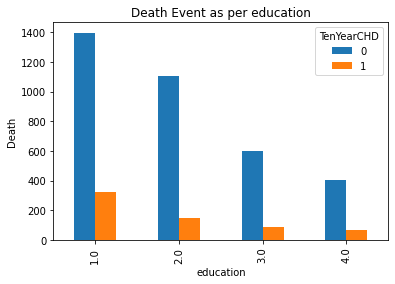

In [18]:
draw_crosstab("education", df)

In [19]:
draw_bar("education", df)

In [13]:
mortality_rate("education", df)

Percentage of people who died and had  education =  4.0  were  14.799154334038056
Percentage of people who died and had  education =  2.0  were  11.731843575418994
Percentage of people who died and had  education =  1.0  were  18.77906976744186
Percentage of people who died and had  education =  3.0  were  12.809315866084425


**SMOKING**

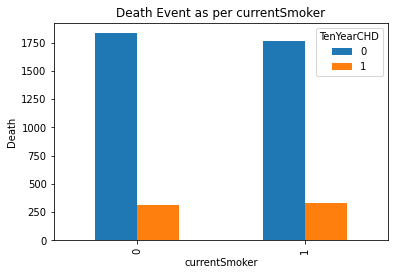

In [21]:
draw_crosstab("currentSmoker", df)

In [22]:
draw_bar("currentSmoker", df)

In [23]:
mortality_rate("currentSmoker", df)

Percentage of people who died and had  currentSmoker =  0  were  14.505597014925373
Percentage of people who died and had  currentSmoker =  1  were  15.902578796561603


**Gender**

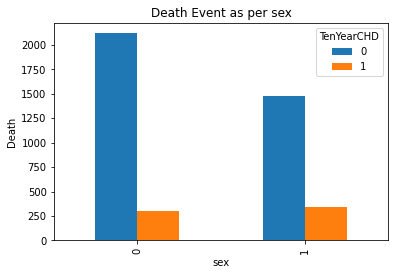

In [15]:
draw_crosstab("sex",df)

In [18]:
draw_bar("sex", df)

In [17]:
mortality_rate("sex", df)

Percentage of people who died and had  sex =  1  were  18.8565145684442
Percentage of people who died and had  sex =  0  were  12.443158329888384


**BPMeds**

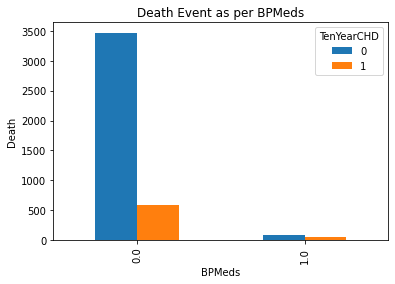

In [27]:
draw_crosstab("BPMeds", df)

In [28]:
draw_bar("BPMeds", df)

In [29]:
mortality_rate("BPMeds", df)

Percentage of people who died and had  BPMeds =  0.0  were  14.577690224082737
Percentage of people who died and had  BPMeds =  1.0  were  33.064516129032256


**Prevalent Stroke**

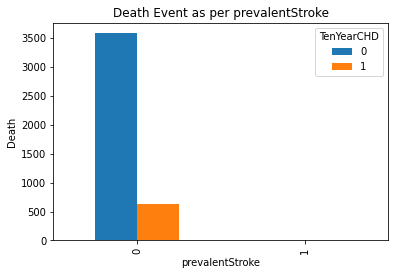

In [30]:
draw_crosstab("prevalentStroke", df)

In [31]:
draw_bar("prevalentStroke", df)

In [32]:
mortality_rate("prevalentStroke", df)

Percentage of people who died and had  prevalentStroke =  0  were  15.02492285782103
Percentage of people who died and had  prevalentStroke =  1  were  44.0


**Prevalent Hyp**

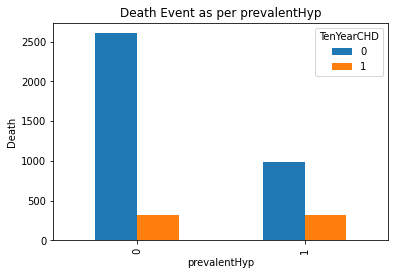

In [19]:
draw_crosstab("prevalentHyp", df)

In [34]:
draw_bar("prevalentHyp", df)

In [20]:
mortality_rate("prevalentHyp", df)

Percentage of people who died and had  prevalentHyp =  0  were  10.917180013689254
Percentage of people who died and had  prevalentHyp =  1  were  24.696048632218844


**Diabetes** 

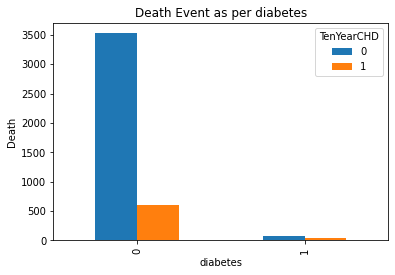

In [36]:
draw_crosstab("diabetes", df)

In [37]:
draw_bar("diabetes", df)

In [38]:
mortality_rate("diabetes", df)

Percentage of people who died and had  diabetes =  0  were  14.628239283119399
Percentage of people who died and had  diabetes =  1  were  36.69724770642202


Age

In [39]:
g_20=list()
g_40=list()
g_60=list()
greater60 = list()
for i in df.age:
  if i<=20:
    g_20.append(1)
    g_40.append(0)
    g_60.append(0)
    greater60.append(0)

  elif i>20 and i<=40:
    g_20.append(0)
    g_40.append(1)
    g_60.append(0)
    greater60.append(0)
  
  elif i>40 and i<=60:
    g_20.append(0)
    g_40.append(0)
    g_60.append(1)
    greater60.append(0)
  
  elif i>60:
    g_20.append(0)
    g_40.append(0)
    g_60.append(0)
    greater60.append(1)

In [40]:
df['age_till_20'] = g_20
df['age_bet_20_40'] = g_40
df['age_bet_40_60'] = g_60
df['age_gret_60'] = greater60

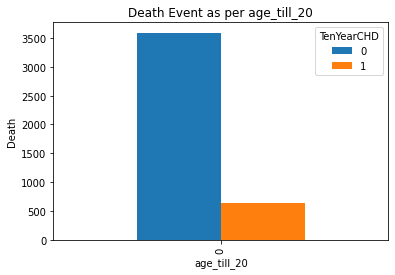

In [41]:
draw_crosstab("age_till_20", df)

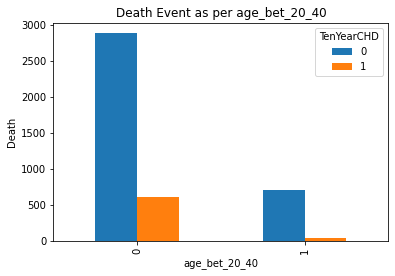

In [42]:
draw_crosstab("age_bet_20_40", df)

In [43]:
mortality_rate("age_bet_20_40", df)

Percentage of people who died and had  age_bet_20_40 =  1  were  5.093833780160858
Percentage of people who died and had  age_bet_20_40 =  0  were  17.353951890034363


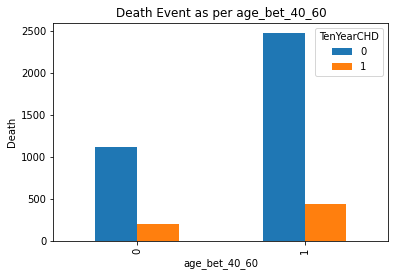

In [44]:
draw_crosstab("age_bet_40_60", df)

In [45]:
mortality_rate("age_bet_40_60", df)

Percentage of people who died and had  age_bet_40_60 =  0  were  15.320754716981133
Percentage of people who died and had  age_bet_40_60 =  1  were  15.139031925849638


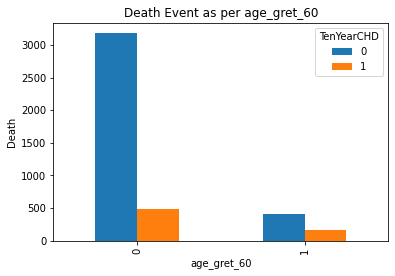

In [46]:
draw_crosstab("age_gret_60", df)

In [47]:
mortality_rate("age_gret_60", df)

Percentage of people who died and had  age_gret_60 =  0  were  13.09100847226018
Percentage of people who died and had  age_gret_60 =  1  were  28.497409326424872


**More than one parameter**

Diabetes and Smoking

In [48]:
df_smoker = df.loc[df['currentSmoker'] == 1]
df_currsmoker_plus_diabetes = df_smoker.loc[df_smoker['diabetes'] == 1]

In [49]:
df_currsmoker_plus_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 56 to 4203
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           39 non-null     int64  
 1   age              39 non-null     int64  
 2   education        39 non-null     float64
 3   currentSmoker    39 non-null     int64  
 4   cigsPerDay       39 non-null     float64
 5   BPMeds           39 non-null     float64
 6   prevalentStroke  39 non-null     int64  
 7   prevalentHyp     39 non-null     int64  
 8   diabetes         39 non-null     int64  
 9   totChol          38 non-null     float64
 10  sysBP            39 non-null     float64
 11  diaBP            39 non-null     float64
 12  BMI              38 non-null     float64
 13  heartRate        39 non-null     float64
 14  glucose          36 non-null     float64
 15  TenYearCHD       39 non-null     int64  
 16  age_till_20      39 non-null     int64  
 17  age_bet_20_40  

In [50]:
draw_bar("diabetes", df_currsmoker_plus_diabetes)

In [51]:
mortality_rate("diabetes", df_currsmoker_plus_diabetes)

Percentage of people who died and had  diabetes =  1  were  35.8974358974359


Gender and Smoking

In [52]:
df_gender_male = df.loc[df['gender'] == 1]
df_currsmoker_plus_male = df_gender_male.loc[df_gender_male['currentSmoker'] == 1]

In [53]:
df_gender_female = df.loc[df['gender'] == 0]
df_currsmoker_plus_female = df_gender_female.loc[df_gender_female['currentSmoker'] == 1]

In [54]:
draw_bar("currentSmoker", df_currsmoker_plus_male)

In [55]:
draw_bar("currentSmoker", df_currsmoker_plus_female)

In [56]:
mortality_rate("currentSmoker", df_currsmoker_plus_male)

Percentage of people who died and had  currentSmoker =  1  were  20.253164556962027


In [57]:
mortality_rate("currentSmoker", df_currsmoker_plus_female)

Percentage of people who died and had  currentSmoker =  1  were  11.03238866396761


Gender and Education

In [21]:
df_gender_male = df.loc[df['sex'] == 1]

df_edu1_plus_male = df_gender_male.loc[df_gender_male['education'] == 1]
df_edu2_plus_male = df_gender_male.loc[df_gender_male['education'] == 2]
df_edu3_plus_male = df_gender_male.loc[df_gender_male['education'] == 3]
df_edu4_plus_male = df_gender_male.loc[df_gender_male['education'] == 4]

In [22]:
mortality_rate("education", df_edu1_plus_male)
mortality_rate("education", df_edu2_plus_male)
mortality_rate("education", df_edu3_plus_male)
mortality_rate("education", df_edu4_plus_male)

Percentage of people who died and had  education =  1.0  were  21.879021879021877
Percentage of people who died and had  education =  2.0  were  13.905930470347649
Percentage of people who died and had  education =  3.0  were  16.517857142857142
Percentage of people who died and had  education =  4.0  were  19.92753623188406


In [23]:
df_gender_female = df.loc[df['sex'] == 0]

df_edu1_plus_female = df_gender_female.loc[df_gender_female['education'] == 1]
df_edu2_plus_female = df_gender_female.loc[df_gender_female['education'] == 2]
df_edu3_plus_female = df_gender_female.loc[df_gender_female['education'] == 3]
df_edu4_plus_female = df_gender_female.loc[df_gender_female['education'] == 4]

In [24]:
mortality_rate("education", df_edu1_plus_female)
mortality_rate("education", df_edu2_plus_female)
mortality_rate("education", df_edu3_plus_female)
mortality_rate("education", df_edu4_plus_female)

Percentage of people who died and had  education =  1.0  were  16.224814422057264
Percentage of people who died and had  education =  2.0  were  10.340314136125654
Percentage of people who died and had  education =  3.0  were  11.01511879049676
Percentage of people who died and had  education =  4.0  were  7.614213197969544


Gender and Diabetes

In [62]:
df_gender_male = df.loc[df['gender'] == 1]
df_diab_plus_male = df_gender_male.loc[df_gender_male['diabetes'] == 1]

df_gender_female = df.loc[df['gender'] == 0]
df_diab_plus_female = df_gender_female.loc[df_gender_female['diabetes'] == 1]

In [63]:
draw_bar("diabetes", df_diab_plus_male)

In [64]:
draw_bar("diabetes", df_diab_plus_female)

In [65]:
mortality_rate("diabetes", df_diab_plus_male)

Percentage of people who died and had  diabetes =  1  were  42.30769230769231


In [66]:
mortality_rate("diabetes", df_diab_plus_female)

Percentage of people who died and had  diabetes =  1  were  31.57894736842105


**TRAINING**

In [9]:
y = df1.TenYearCHD
X = df1.drop(columns=["TenYearCHD"])
X.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0


In [10]:
y.value_counts()

0.0    3594
1.0     644
Name: TenYearCHD, dtype: int64

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.25, random_state=69)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model_cat = CatBoostClassifier(n_estimators=100  ,  depth = 8, random_state=42)
model_cat.fit(X_train , y_train)

print(model_cat.score(X_test , y_test))
print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, model_cat.predict(X_train))))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, model_cat.predict(X_test))))


Learning rate set to 0.139429
0:	learn: 0.6343218	total: 6.55ms	remaining: 649ms
1:	learn: 0.5840413	total: 11.3ms	remaining: 554ms
2:	learn: 0.5451224	total: 16.3ms	remaining: 526ms
3:	learn: 0.5149053	total: 22.9ms	remaining: 549ms
4:	learn: 0.4907185	total: 33.5ms	remaining: 636ms
5:	learn: 0.4704704	total: 40.4ms	remaining: 633ms
6:	learn: 0.4539860	total: 47.6ms	remaining: 632ms
7:	learn: 0.4410247	total: 54.4ms	remaining: 626ms
8:	learn: 0.4291406	total: 60.5ms	remaining: 612ms
9:	learn: 0.4197754	total: 66.4ms	remaining: 598ms
10:	learn: 0.4120451	total: 73.2ms	remaining: 592ms
11:	learn: 0.4055941	total: 79.5ms	remaining: 583ms
12:	learn: 0.3997934	total: 86.2ms	remaining: 577ms
13:	learn: 0.3947318	total: 92.7ms	remaining: 569ms
14:	learn: 0.3900500	total: 98.8ms	remaining: 560ms
15:	learn: 0.3864014	total: 104ms	remaining: 547ms
16:	learn: 0.3831250	total: 110ms	remaining: 537ms
17:	learn: 0.3795468	total: 117ms	remaining: 531ms
18:	learn: 0.3769854	total: 123ms	remaining: 52

In [16]:
y_pred = model_cat.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

[[897  10]
 [141  12]]
0.8641618497109826


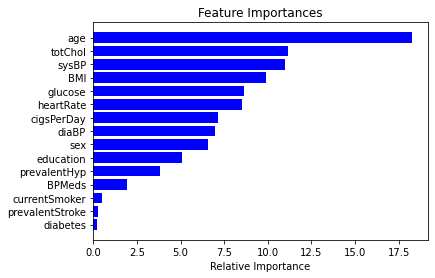

In [17]:
importances = model_cat.feature_importances_
indices = np.argsort(importances)
features = df1.columns

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [18]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=2 , min_samples_split=2, random_state=42)
rnd_clf.fit(X_train, y_train)

# print(rnd_clf.score(X_test , y_test))
print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, rnd_clf.predict(X_train))))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, rnd_clf.predict(X_test))))

Training Accuracy: 0.863
Testing Accuracy: 0.862


In [19]:
y_pred = rnd_clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

[[907   0]
 [146   7]]
0.8613485280151947


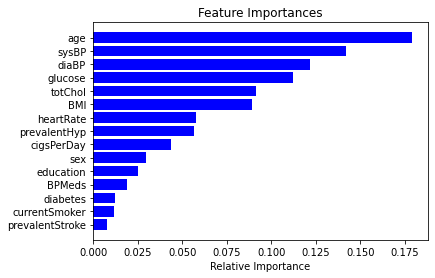

In [20]:
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)
features = df1.columns

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [21]:
xgb = XGBClassifier( n_estimators=50, max_depth=2, 
                        colsample_bylevel=0.7, colsample_bynode=0.7, random_state= 69)

xgb_model = xgb.fit(X_train, y_train)

print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, xgb_model.predict(X_train))))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, xgb_model.predict(X_test))))

Training Accuracy: 0.860
Testing Accuracy: 0.861


In [22]:
y_pred = xgb_model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

[[900   7]
 [140  13]]
0.8653846153846154


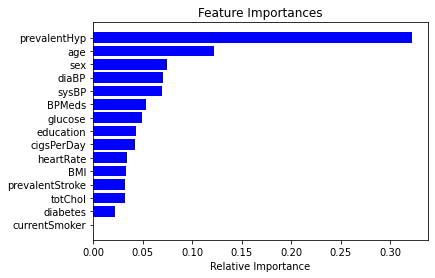

In [23]:
importances = xgb_model.feature_importances_
indices = np.argsort(importances)
features = df1.columns

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [24]:
logr = LogisticRegression(random_state=69)
logr.fit(X_train,y_train)

print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, logr.predict(X_train))))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, logr.predict(X_test))))

Training Accuracy: 0.851
Testing Accuracy: 0.864


In [25]:
y_pred = logr.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

[[904   3]
 [141  12]]
0.8650717703349282


In [26]:
nb = GaussianNB()
nb.fit(X_train,y_train)

print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, nb.predict(X_train))))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, nb.predict(X_test))))

Training Accuracy: 0.824
Testing Accuracy: 0.825


In [27]:
y_pred = nb.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

[[848  59]
 [126  27]]
0.8706365503080082


In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, knn.predict(X_train))))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, knn.predict(X_test))))

Training Accuracy: 0.850
Testing Accuracy: 0.858


In [29]:
y_pred = knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

[[901   6]
 [144   9]]
0.8622009569377991


In [30]:
dt = DecisionTreeClassifier(random_state=42,max_depth=6,min_samples_split=2, min_samples_leaf=1)
dt.fit(X_train, y_train)

print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, dt.predict(X_train))))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, dt.predict(X_test))))

Training Accuracy: 0.861
Testing Accuracy: 0.844


In [31]:
y_pred = dt.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

[[883  24]
 [141  12]]
0.8623046875


In [32]:
svc =  SVC(kernel='rbf', C=2, gamma='auto')
svc.fit(X_train, y_train)

print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, svc.predict(X_train))))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Training Accuracy: 0.867
Testing Accuracy: 0.859


In [33]:
y_pred = svc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

[[902   5]
 [144   9]]
0.8623326959847036


In [34]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.6)
ada.fit(X_train, y_train)

print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, ada.predict(X_train))))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, ada.predict(X_test))))

Training Accuracy: 0.860
Testing Accuracy: 0.858


In [35]:
y_pred = ada.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

[[894  13]
 [138  15]]
0.8662790697674418


In [36]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X, y)

print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, lgb.predict(X_train))))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, lgb.predict(X_test))))

Training Accuracy: 0.846
Testing Accuracy: 0.856


In [37]:
y_pred = lgb.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

[[907   0]
 [153   0]]
0.8556603773584905


In [74]:
scv=StackingCVClassifier(classifiers=[xgb_model,logr,rnd_clf,nb,lgb,ada,svc,dt,knn,model_cat],meta_classifier= knn,random_state=42, cv=5)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

ms
20:	learn: 0.3732134	total: 70ms	remaining: 263ms
21:	learn: 0.3708477	total: 73.4ms	remaining: 260ms
22:	learn: 0.3684373	total: 76.6ms	remaining: 256ms
23:	learn: 0.3659693	total: 80ms	remaining: 253ms
24:	learn: 0.3637388	total: 83.3ms	remaining: 250ms
25:	learn: 0.3619606	total: 86.8ms	remaining: 247ms
26:	learn: 0.3603299	total: 89.9ms	remaining: 243ms
27:	learn: 0.3579499	total: 93.2ms	remaining: 240ms
28:	learn: 0.3562622	total: 96.2ms	remaining: 236ms
29:	learn: 0.3549146	total: 99.5ms	remaining: 232ms
30:	learn: 0.3536714	total: 103ms	remaining: 229ms
31:	learn: 0.3521320	total: 106ms	remaining: 226ms
32:	learn: 0.3506880	total: 110ms	remaining: 222ms
33:	learn: 0.3497231	total: 113ms	remaining: 219ms
34:	learn: 0.3479182	total: 116ms	remaining: 216ms
35:	learn: 0.3461509	total: 119ms	remaining: 212ms
36:	learn: 0.3446367	total: 123ms	remaining: 209ms
37:	learn: 0.3439981	total: 126ms	remaining: 205ms
38:	learn: 0.3430966	total: 130ms	remaining: 203ms
39:	learn: 0.3424165	t

In [75]:
y_pred = scv.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, scv.predict(X_train))))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, scv.predict(X_test))))
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print("Recall - ",recall)
precision = cm[0][0]/(cm[0][0] + cm[0][1])
print("Precision - ", precision)
f1 = 2*((precision*recall)/(precision+recall))
print("F1 - ", f1)

Training Accuracy: 0.852
Testing Accuracy: 0.865
Recall -  0.8645038167938931
Precision -  0.9988974641675854
F1 -  0.926854219948849


<AxesSubplot:>

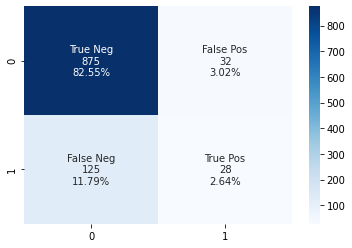

In [48]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in
                scv_conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     scv_conf_matrix.flatten()/np.sum(scv_conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(scv_conf_matrix, annot=labels, fmt="", cmap='Blues')